# Welcome to DFW Python Meetup on Scrapy and Web Crawling!

## by Jacques (Jack) Camier, been programming in Python for three years, predominantly in the web space and some machine learning

## Using Python version 3.6.6 and Scrapy 1.5.1 for the talk today

## This meetup is to give you an introduction (1,000 foot view of Spiders and Scrapy). This should get you excited about designing your own spiders using Scrapy. 

## So what exactly is a spider...well they say a picture is worth a thousand words

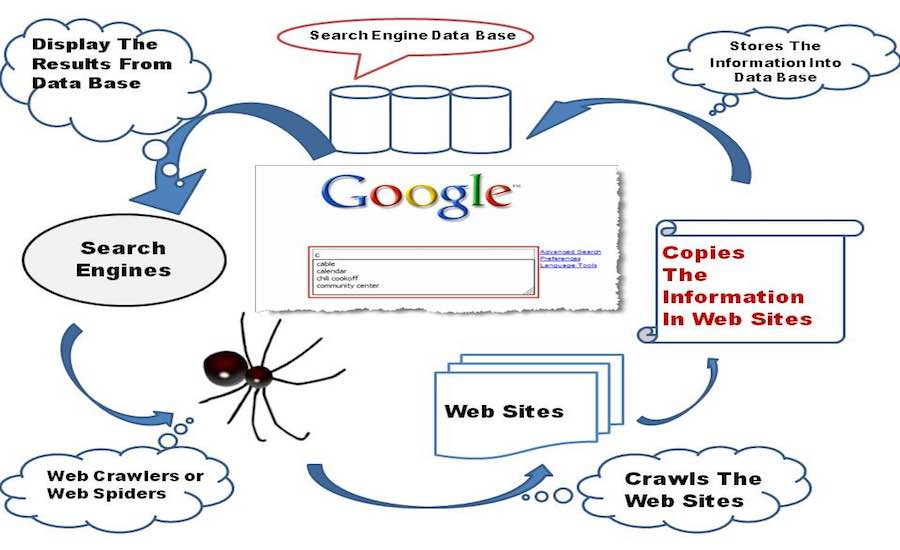

In [1]:
from IPython.display import Image
Image(filename='./web_spiders.jpg') 

## "Google uses a huge set of computers to fetch (or "crawl") billions of pages on the web. The program that does the fetching is called a Googlebot (also known as a robot, bot, or spider). Googlebot uses an algorithmic process - computer programs that determine which sites to crawl, how often, and how many pages to fetch from each site.

## Google's crawl process begins with a list of web page URLs, generated from previous crawl processes, and augmented with Sitemap data (xml file of URLs and metadata) provided by webmasters. As Googlebot visits each of these websites it detects links on each page and adds them to its list of pages to crawl. New sites, changes to existing sites, and dead links are noted and used to update the Google index."
https://support.google.com/webmasters/answer/70897?hl=en

## So what is Scrapy?
## An open source, python framework to crawl web sites and extract structured data which can be used for a wide range of useful applications, like data mining, information processing or historical archival

# With Scrapy, we can create our own spiders using Python!

## You could also create your spider classes with Requests and BeautifulSoup, but Scrapy has the framework already created for you with built in classes and methods

## If you want to follow along, I have put this presentation on my github page:
https://github.com/jcamier/dfw_scrapy_talk


## The Scrapy web framework can be found at:
https://scrapy.org/
## And the talk is based on their online tutorial found at:
https://docs.scrapy.org/en/latest/intro/tutorial.html

## There are two ways to install this package, either:
## For conda installations:

## conda install -c conda-forge scrapy


## For Python from PyPI:
## pip install Scrapy

<font size='5'color='blue'face="verdana">Let's create our first spider by starting a project!</font>

In [2]:
# First we need to import the Scrapy module
try:
    import scrapy
    print('Scrapy is now imported')
except: 
    print('Scrapy did not load properly, please see if it is installed properly')

Scrapy is now imported


## Next, we will create the Spider project
### I will be using Pycharm for part of the talk as I had problems with Jupyter's magic functions in some cases
https://www.jetbrains.com/pycharm/

## Starting with activating my virtual environment called venv

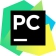

In [4]:
Image(filename='./pycharm_logo.jpeg') 

## #scrapy startproject dfw_python_spider
### I had problems creating the project in Jupyter so I ran the command line in my terminal previously

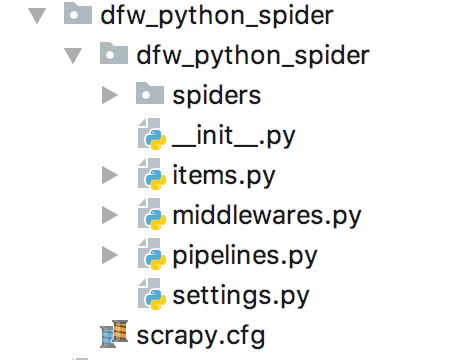

In [5]:
## It should create a project folder similar to the picture below
Image(filename='./dfw_scrapy_project.png')

## Spiders are classes that you define and Scrapy uses these objects to scrape information from a website (or a group of websites). They must subclass scrapy.Spider and define the initial requests to make, optionally how to follow links in the pages, and how to parse the downloaded page content to extract data.

In [6]:
'''Setting variable to main directory and folder of project directory. This is where you normally
run the spider in the command line.'''
import os
# I am on a mac, for windows you might need to use '.\\..\\etc'
current_dir = os.getcwd() # Your directory will be different than mine...
print(current_dir)

/Users/jacquescamier/DFW_Python_Talks/dfw_scrapy_talk


In [12]:
project_dir = '//dfw_python_spider'
os.chdir(current_dir+project_dir)
print(os.getcwd())

/Users/jacquescamier/DFW_Python_Talks/dfw_scrapy_talk/dfw_python_spider


In [13]:
spider_class_dir = '//dfw_python_spider//spiders'
os.chdir(current_dir+project_dir+spider_class_dir)
print(os.getcwd())

/Users/jacquescamier/DFW_Python_Talks/dfw_scrapy_talk/dfw_python_spider/dfw_python_spider/spiders


## Create a spider called quotes_spider.py in the spiders folder with the following code snippet:


import scrapy


class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        urls = [
            'http://quotes.toscrape.com/page/1/',
            'http://quotes.toscrape.com/page/2/',
        ]
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        page = response.url.split("/")[-2]
        filename = 'quotes-%s.html' % page
        with open(filename, 'wb') as f:
            f.write(response.body)

## As you can see our Spider:QuotesSpider subclasses scrapy.Spider and defines some attributes and methods

## name: identifies the Spider. It must be unique within a project, that is, you can’t set the same name for different Spiders.

## start_requests(): must return an iterable of Requests (you can return a list of requests or write a generator function) which the Spider will begin to crawl from. Subsequent requests will be generated successively from these initial requests.

## parse(): a method that will be called to handle the response downloaded for each of the requests made. The response parameter is an instance of TextResponse that holds the page content and has further helpful methods to handle it.

## The parse() method usually parses the response, extracting the scraped data as dicts and also finding new URLs to follow and creating new requests (Request) from them.

## To put our spider to work, go to the project’s top level directory and run:
## In this case, it is dfw_python_spider

In [14]:
os.chdir(current_dir+project_dir)
print(os.getcwd()) 
# for me it is /Users/jacquescamier/DFW_Python_Talks/dfw_scrapy_talk/dfw_python_spider

/Users/jacquescamier/DFW_Python_Talks/dfw_scrapy_talk/dfw_python_spider


In [15]:
#Currently, these are the files in the directory
print(os.listdir('.'))

['dfw_python_spider', 'quotes-2.html', 'scrapy.cfg', 'quotes-1.html']


# Let's run our spider by typing in our terminal/IDE of choice
# scrapy crawl quotes

In [16]:
## After running the spider, we should see the following new files:
## quotes-2.html and quotes-1.html that were generated from our spider
print(os.listdir('.'))

['dfw_python_spider', 'quotes-2.html', 'scrapy.cfg', 'quotes-1.html']


In [17]:
! cat quotes-1.html # here is the html file that was created scraping http://quotes.toscrape.com/page/1/

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

<font size='7'color='green'face="verdana">How cools is that!</font>
## We can go to the website and see the html itself.
http://quotes.toscrape.com/page/1/

## Imagine all the possibilities you can do as you can literally create 100's of spiders to get data you may need for various reasons.
## Weather temperatures, economic data, pricing of items, etc.
## Obviously, nothing illegal.
